# Analysis of the Proton Bunch parameters (Fast Version)

MaxDensityNelderMead Optimizer is used to find maximum posterior. 

In [1]:
using FileIO, ImageMagick, ImageIO, Colors, HDF5
using Distributions
using PyPlot
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using LinearAlgebra
import HDF5
using BenchmarkTools
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BenchmarkTools
using DSP
using BAT 

In [2]:
SMALL_SIZE = 9
MEDIUM_SIZE = 9
BIGGER_SIZE = 9

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [3]:
include("../src/src.jl")
include("../src/plots.jl")

corner_plots (generic function with 1 method)

In [16]:
# The folder with event files: 

files = "../../AWAKE-Run-2/data/05-22/31/" .* readdir("../../AWAKE-Run-2/data/05-22/31/");

## Analyse 1 event: 

In [5]:
epath = files[122] 
edata = get_event_data(epath);

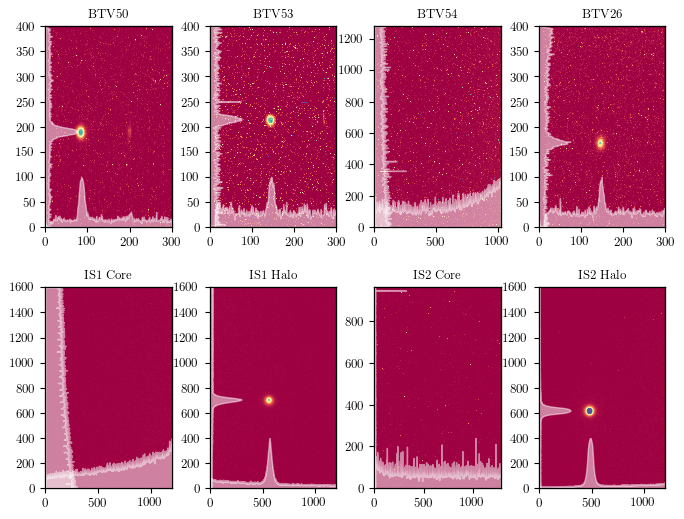

PyObject Text(0.5, 1.0, 'IS2 Halo')

In [6]:
plot_event_data(edata)

In [7]:
projections = def_projections(edata, [1,2,4,6,8]);

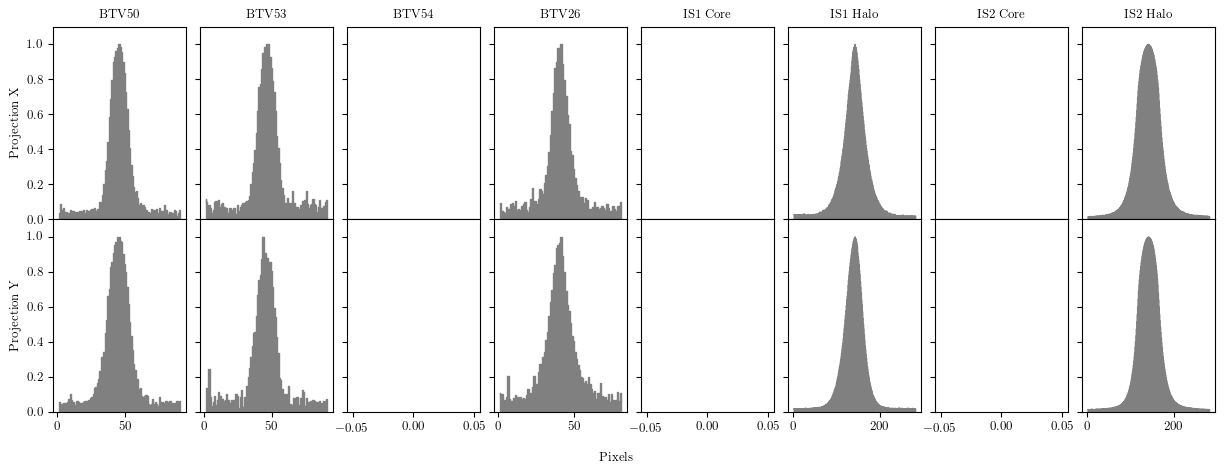

In [8]:
plot_projections(projections)

In [9]:
prior = def_prior_1g(projections)
log_likelihood = log_lik_ndiff(d=projections);
posterior = PosteriorDensity(log_likelihood, prior)

# starting_point = mean(bat_sample(prior).result) # not always works

starting_point = [0.09092074161548026, 0.1322940298573284, 6.447896267690864, 5.2726581952462235, 2.7340649677948203, 45.407040447101735, 45.960978484134756, 40.487371545298124, 140.45550567807004, 139.91751938288374, 44.769604660499574, 44.958883957478456, 40.31719742794034, 137.8594705660492, 140.88237724576078, 0.04796069163816624, 0.06656164934534531, 0.08611297225042647, 0.02195439088076863, 0.01841767381995165, 0.15469027758210882, 0.02414829241195768, 0.17299318972340202, 0.0871730664907527, 0.0842857317050523, 0.014780935172513261, 0.03465410575413016, 0.03838610928735461, 0.0037168695827832425, 0.003197085045435954, 15.91631489066197, 13.868056181602471, 12.45160615619332, 48.07243659959224, 60.71545007425746]
starting_point = varshape(prior)(starting_point)

@time opt_result = bat_findmode(posterior, MaxDensityNelderMead(init = ExplicitInit([starting_point])))

global_mode = opt_result.result

┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


  4.404717 seconds (13.36 M allocations: 1.127 GiB, 7.40% gc time, 80.52% compilation time)


ShapedAsNT((tr_size_core = [0.0913341950358722, 0.1322707399739864], ang_spr_core = [6.458585301713806, 5.274876081774304], waist_core = [2.7289049116331716], tr_size_halo = [0.15, 0.15], ang_spr_halo = [6.0, 6.0], mixt_pow = 1.0, waist_halo = [2.8], algmx = [45.412225086881506, 45.961663722865275, 40.497932553685224, 140.46016025235963, 139.91758526374127], algmy = [44.76247926203667, 44.967925448455794, 40.313054680112344, 137.86549653955728, 140.88838299004047], pedestal = [0.047967669697711976, 0.06648014063159713, 0.08609478612612373, 0.02193216645320782, 0.01837690958990573], light_fluct = [0.15016913315638372, 0.019755157146055472, 0.17160254869863045, 0.08594224547981091, 0.08400325866198881], bckgr_fluct = [0.014541057109427347, 0.03412868582686482, 0.03757898110058635, 0.003679130773573691, 0.0031441227145862435], light_amp = [15.914788012439518, 13.873061572234985, 12.43692740106649, 48.081243258411575, 60.72939555065863], resx = [1.0, 1.0, 1.0, 3.0, 3.0], resy = [1.0, 1.0, 

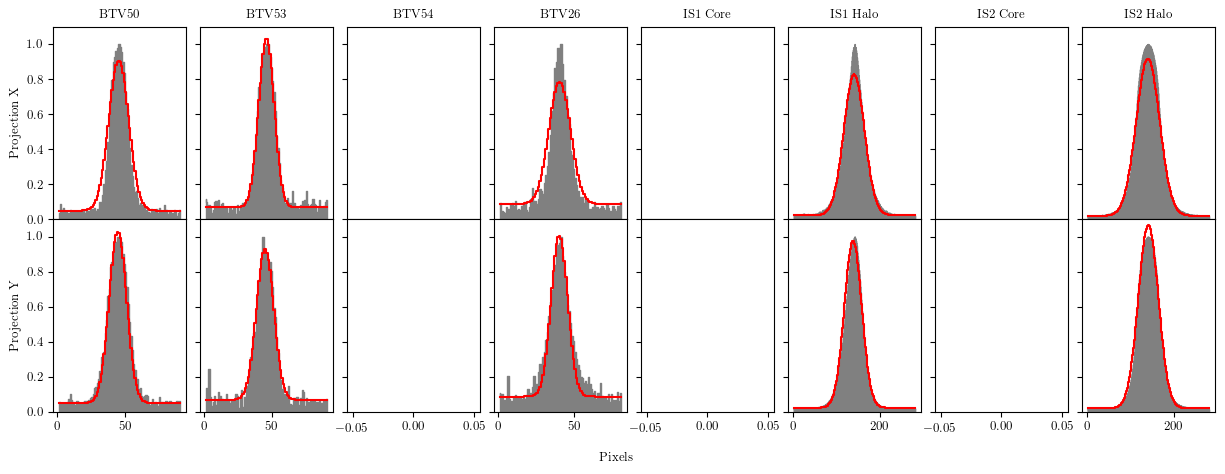

In [10]:
mean_event = generate_event(global_mode[1], projections);

plot_projections(projections, model_data=mean_event)

## Analyse multiple events: 

In [11]:
epath_list = files[119:129]

11-element Vector{String}:
 "../../AWAKE-Run-2/data/05-22/31/1622466573735000000_Type0_106_87.h5"
 "../../AWAKE-Run-2/data/05-22/31/1622466619335000000_Type0_106_88.h5"
 "../../AWAKE-Run-2/data/05-22/31/1622466664935000000_Type0_106_89.h5"
 "../../AWAKE-Run-2/data/05-22/31/1622466710535000000_Type0_106_90.h5"
 "../../AWAKE-Run-2/data/05-22/31/1622466756135000000_Type0_106_91.h5"
 "../../AWAKE-Run-2/data/05-22/31/1622466801735000000_Type0_106_92.h5"
 "../../AWAKE-Run-2/data/05-22/31/1622466847335000000_Type0_106_93.h5"
 "../../AWAKE-Run-2/data/05-22/31/1622466892935000000_Type0_106_94.h5"
 "../../AWAKE-Run-2/data/05-22/31/1622466938535000000_Type0_106_95.h5"
 "../../AWAKE-Run-2/data/05-22/31/1622466984135000000_Type0_106_96.h5"
 "../../AWAKE-Run-2/data/05-22/31/1622467029735000000_Type0_106_97.h5"

In [12]:
starting_point = [0.09092074161548026, 0.1322940298573284, 
    6.447896267690864, 5.2726581952462235, 2.7340649677948203, 
    45.407040447101735, 45.960978484134756, 40.487371545298124, 
    140.45550567807004, 139.91751938288374, 44.769604660499574, 
    44.958883957478456, 40.31719742794034, 137.8594705660492, 
    140.88237724576078, 0.04796069163816624, 0.06656164934534531, 
    0.08611297225042647, 0.02195439088076863, 0.01841767381995165, 
    0.15469027758210882, 0.02414829241195768, 0.17299318972340202, 
    0.0871730664907527, 0.0842857317050523, 0.014780935172513261, 
    0.03465410575413016, 0.03838610928735461, 0.0037168695827832425, 
    0.003197085045435954, 15.91631489066197, 13.868056181602471, 
    12.45160615619332, 48.07243659959224, 60.71545007425746] # Precomputed Starting Point

starting_point = varshape(prior)(starting_point)

ShapedAsNT((tr_size_core = [0.09092074161548026, 0.1322940298573284], ang_spr_core = [6.447896267690864, 5.2726581952462235], waist_core = [2.7340649677948203], tr_size_halo = [0.15, 0.15], ang_spr_halo = [6.0, 6.0], mixt_pow = 1.0, waist_halo = [2.8], algmx = [45.407040447101735, 45.960978484134756, 40.487371545298124, 140.45550567807004, 139.91751938288374], algmy = [44.769604660499574, 44.958883957478456, 40.31719742794034, 137.8594705660492, 140.88237724576078], pedestal = [0.04796069163816624, 0.06656164934534531, 0.08611297225042647, 0.02195439088076863, 0.01841767381995165], light_fluct = [0.15469027758210882, 0.02414829241195768, 0.17299318972340202, 0.0871730664907527, 0.0842857317050523], bckgr_fluct = [0.014780935172513261, 0.03465410575413016, 0.03838610928735461, 0.0037168695827832425, 0.003197085045435954], light_amp = [15.91631489066197, 13.868056181602471, 12.45160615619332, 48.07243659959224, 60.71545007425746], resx = [1.0, 1.0, 1.0, 3.0, 3.0], resy = [1.0, 1.0, 1.0, 

In [13]:
mode_vals = []

for (ind, vals) in enumerate(epath_list)
    edata = get_event_data(vals)
    projections = def_projections(edata, [1,2,4,6,8])
    
    prior = def_prior_1g(projections)
    log_likelihood = log_lik_ndiff(d=projections)
    posterior = PosteriorDensity(log_likelihood, prior)
    
    @time opt_result = bat_findmode(posterior, MaxDensityNelderMead(init = ExplicitInit([starting_point])))
    global_mode = opt_result.result[1]
    
    mean_event = generate_event(global_mode, projections);
    plot_projections(projections, model_data=mean_event, savefig=true, savepath = "../data/demo-1/$ind.pdf");
    
    push!(mode_vals, global_mode)
end

┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


  0.848052 seconds (2.00 M allocations: 532.582 MiB, 13.78% gc time)


┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


  1.095879 seconds (2.02 M allocations: 538.239 MiB, 35.70% gc time)


┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


  0.621700 seconds (1.99 M allocations: 529.177 MiB, 6.36% gc time)


┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


  0.660747 seconds (2.05 M allocations: 546.505 MiB, 6.00% gc time)


┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


  0.651149 seconds (2.02 M allocations: 538.453 MiB, 6.29% gc time)


┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


  0.641209 seconds (1.97 M allocations: 523.913 MiB, 5.64% gc time)


┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


  0.665795 seconds (1.99 M allocations: 529.223 MiB, 6.40% gc time)


┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


  0.625108 seconds (1.89 M allocations: 501.673 MiB, 6.07% gc time)


┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


  0.682857 seconds (1.96 M allocations: 521.309 MiB, 6.95% gc time)


┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


  0.679152 seconds (1.97 M allocations: 523.422 MiB, 6.53% gc time)


┌ Info: Using tranform algorithm DensityIdentityTransform()
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


  0.774465 seconds (1.94 M allocations: 516.764 MiB, 15.81% gc time)


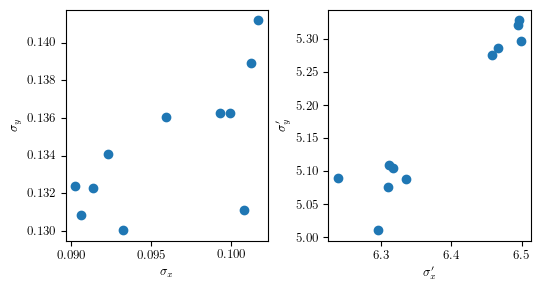

PyObject Text(290.2952574040406, 0.5, "$\\sigma'_y$")

In [17]:
# Results: 

σ_x = [i.tr_size_core[1] for i in mode_vals]
σ_y = [i.tr_size_core[2] for i in mode_vals]

σp_x = [i.ang_spr_core[1] for i in mode_vals]
σp_y = [i.ang_spr_core[2] for i in mode_vals]

fig, ax = plt.subplots(1,2, figsize=(6,3))
    
fig.subplots_adjust(hspace=0.3, wspace=0.3)

ax[1].scatter(σ_x, σ_y)
ax[2].scatter(σp_x, σp_y)

ax[1].set_xlabel(L"\sigma_x")
ax[1].set_ylabel(L"\sigma_y")

ax[2].set_xlabel(L"\sigma'_x")
ax[2].set_ylabel(L"\sigma'_y")